<a href="https://colab.research.google.com/github/venkatesh-eranti/clustering_-milestone-project-Wholesale-customers-/blob/main/clustering__milestone_project_Wholesale_customers_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# problem statement

In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure.
* One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. 
* Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer

The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

# Reading and understanding the data

## importing required libraries

In [2]:
# reading and processing the data
import numpy as np
import pandas as pd
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# splitting test and train
from sklearn.model_selection import train_test_split
# rescalling the data
from sklearn.preprocessing import StandardScaler
# modeling the data
from sklearn.ensemble import RandomForestRegressor
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
# evaluation metrics
from sklearn.metrics import silhouette_score,r2_score
# feature transformation
from sklearn.decomposition import PCA

## loading the data from repository

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [4]:
df1=df.copy()

In [5]:
df.drop(['Channel','Region'],axis=1,inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## understanding the data

In [6]:
df.shape

(440, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories are actually relevant for understanding customer purchasing. 
* That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products?
* We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [9]:
new_data=df.copy()
new_data_train,new_data_test=train_test_split(new_data,train_size=0.75,random_state=42)

In [10]:
new_data_train.shape,new_data_test.shape

((330, 6), (110, 6))

Delicassen is chosen as this feature have less population mean std. so this might be unuseful

In [11]:
x_train=new_data_train.drop('Delicassen',axis=1)
y_train=new_data_train['Delicassen']
x_test=new_data_test.drop('Delicassen',axis=1)
y_test=new_data_test['Delicassen']

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((330, 5), (330,), (110, 5), (110,))

## building a randomforest model to predict `Delicassen`

In [14]:
reg=RandomForestRegressor(random_state=42)
reg.fit(x_train,y_train)
y_test_pred=reg.predict(x_test)
r2_score(y_test,y_test_pred)

-0.66733879698778

* the predicted score is -0.66 which suggests that model failed to fit the data
* The negative $R^2$ value implies that it fits worser than a `horizontal line`, therefore suggesting that the chosen model does not follow the trend of the data. So, it might be a valuable for identifying customers spending habits.

# Visualise feature distributions

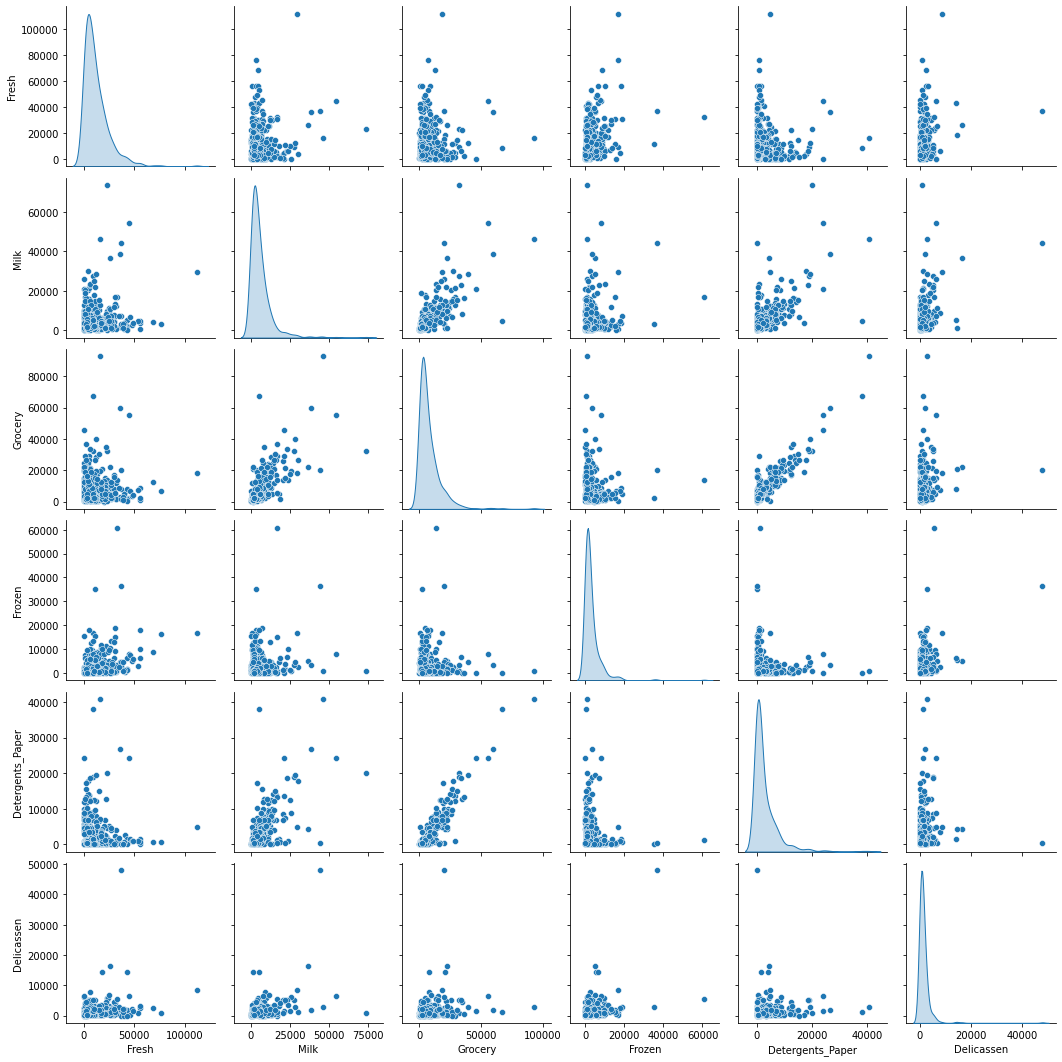

In [ ]:
sns.pairplot(df,diag_kind='kde')

* from the above plot, the data appears to be right skewed with a moderate number of outliers
* as the feature i tried to delete Delicassen is not showing any correlation with any other features so this may be an important feature to predict.

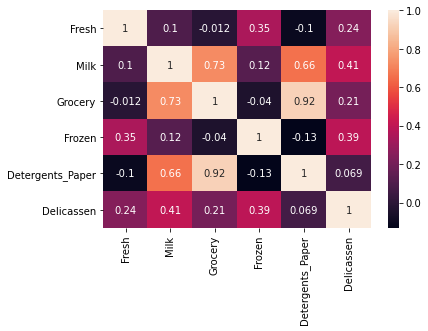

In [ ]:
sns.heatmap(df.corr(),annot=True)

from the above heatmap and scatter plot it is clear that:
* milk vs grocery, milk vs Detergents_paper
* grocry vs Detergents_paper are highly correlated

# Feature scaling
As, the data is not normally distributed, especially the mean and median vary significantly (indicating a large skew)
* A simpler approach which can work in most cases would be applying the natural logarithm.

In [15]:
log_df=np.log(df)
log_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


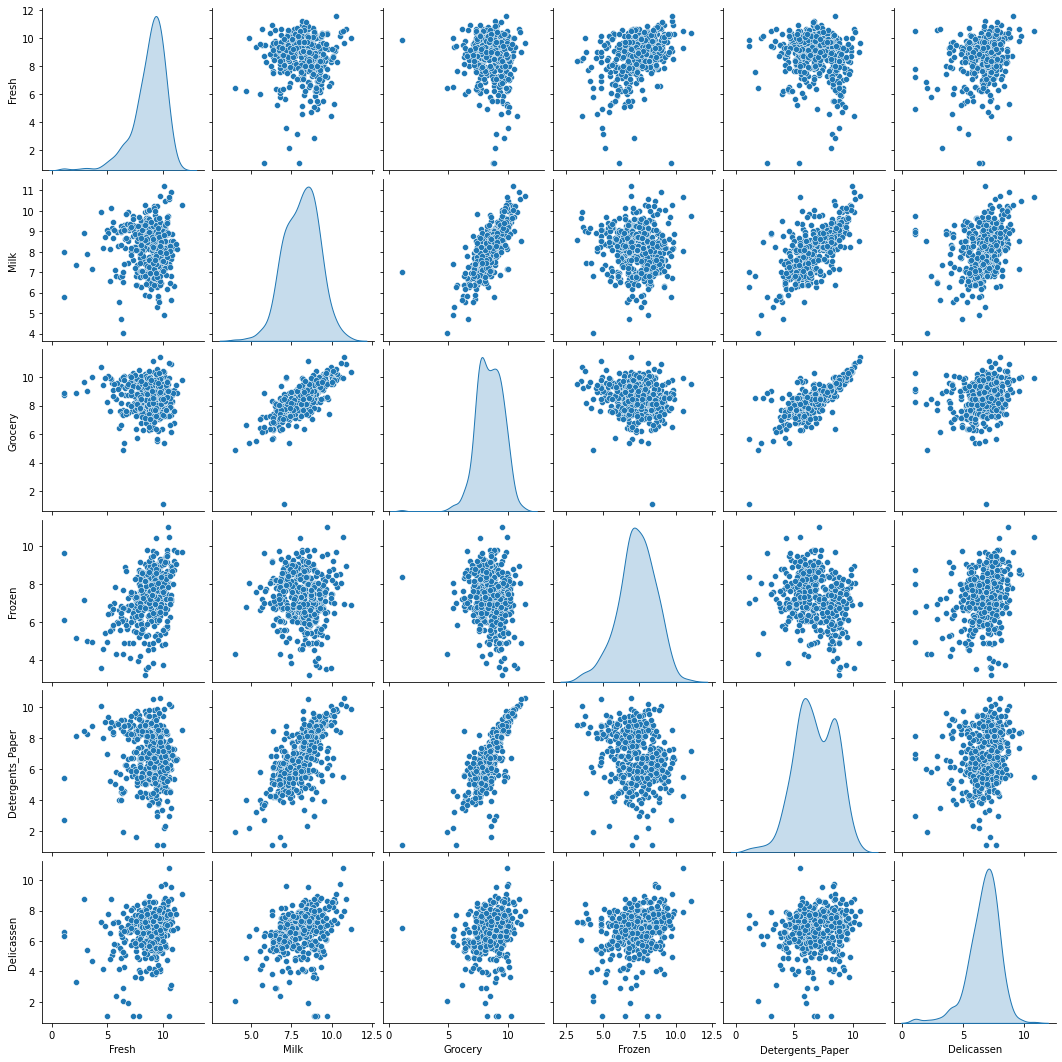

In [ ]:
sns.pairplot(log_df,diag_kind='kde')

observation:
After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal.

# Outlier Detection

Tukey's Method is used for identfying outliers (beyond 1.5 times the interquartile range (IQR))

In [16]:
outliers_index=[]
for i in log_df.columns:
    q1=np.percentile(log_df[i],25)
    q3=np.percentile(log_df[i],75)
    iqr=q3-q1
    for y in log_df[~((log_df[i] >= q1-(1.5*iqr)) & (log_df[i] <= q3+(1.5*iqr)))].index.values:
        outliers_index.append(y)

In [17]:
log_df.shape

(440, 6)

In [18]:
final_df=log_df.drop(log_df.index[outliers_index])
final_df.shape

(398, 6)

In [19]:
final_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


# Feature Transformation : PCA
Now i will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers <br>
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply `PCA` to the `final_df` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.


In [20]:
pca=PCA(n_components=6).fit(final_df)

In [24]:
pca.components_

array([[-0.09758688,  0.41085006,  0.45111781, -0.12804262,  0.75951245,
         0.15785331],
       [ 0.60077834,  0.1369893 ,  0.08516261,  0.62996118, -0.03761194,
         0.46344461],
       [-0.74520543,  0.15440822, -0.02038937,  0.26695167, -0.23485013,
         0.54221164],
       [ 0.26670888,  0.13749532,  0.0709773 , -0.71328102, -0.31568384,
         0.54451588],
       [ 0.0114087 ,  0.70825884,  0.31682301,  0.06711674, -0.47290085,
        -0.41197399],
       [-0.05428877, -0.51774387,  0.82668599,  0.04707807, -0.20803866,
        -0.00937317]])

In [30]:
dimension=[f'dimension {i}' for i in range(1,len(pca_components)+1)]
dimension

['dimension 1',
 'dimension 2',
 'dimension 3',
 'dimension 4',
 'dimension 5',
 'dimension 6']

In [35]:
pca_components=pd.DataFrame(np.round(pca.components_,3),columns=final_df.columns)
pca_components.index=dimension
pca_components

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
dimension 1,-0.098,0.411,0.451,-0.128,0.760,0.158
dimension 2,0.601,0.137,0.085,0.630,-0.038,0.463
dimension 3,-0.745,0.154,-0.020,0.267,-0.235,0.542
dimension 4,0.267,0.137,0.071,-0.713,-0.316,0.545
dimension 5,0.011,0.708,0.317,0.067,-0.473,-0.412
dimension 6,-0.054,-0.518,0.827,0.047,-0.208,-0.009


In [29]:
variance_ratio=pca.explained_variance_ratio_
variance_ratio

array([0.49930484, 0.22594807, 0.10488309, 0.09781761, 0.04879109,
       0.0232553 ])

In [37]:
pca_variance_ratio=pd.DataFrame(np.round(variance_ratio,3),columns=['Explained Variance'])
pca_variance_ratio.index=dimension
pca_variance_ratio

,Explained Variance
dimension 1,0.499
dimension 2,0.226
dimension 3,0.105
dimension 4,0.098
dimension 5,0.049
dimension 6,0.023


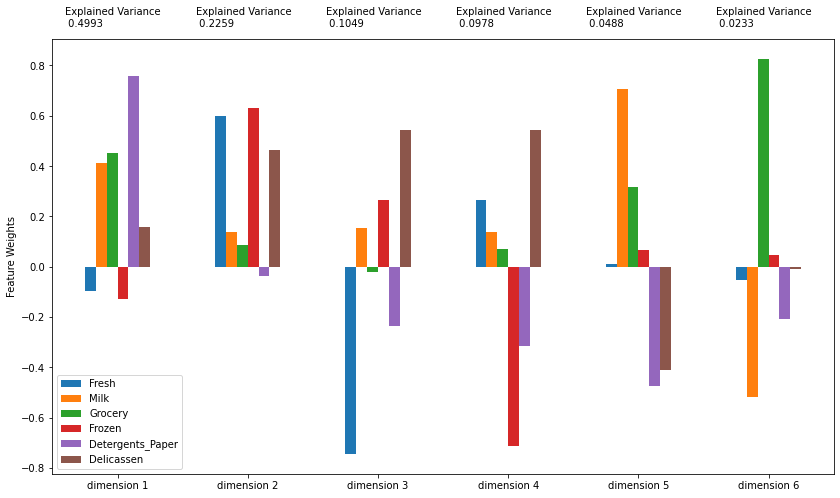

In [66]:
fig, ax = plt.subplots(figsize = (14,8))
pca_components.plot.bar(ax=ax)
plt.ylabel("Feature Weights")
plt.xticks(rotation=0)
for i,v in enumerate(variance_ratio):
    plt.text(i-0.4,ax.get_ylim()[1] + 0.05,"Explained Variance\n %.4f"%(v))

In [22]:
cumulative_sum=np.cumsum(pca.explained_variance_ratio_)
cumulative_sum

array([0.49930484, 0.7252529 , 0.83013599, 0.92795361, 0.9767447 ,
       1.        ])

In [23]:
np.argmax(cumulative_sum>=0.95)+1

5

Apply PCA by fitting the final data with only two dimensions

In [68]:
pca=PCA(n_components=2).fit(final_df)
reduced_data=pca.transform(final_df)

In [69]:
reduced_df=pd.DataFrame(reduced_data,columns=['dimension_1','dimension_2'])
reduced_df

,dimension_1,dimension_2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314
...,...,...
393,1.092404,-0.088703
394,-0.363319,2.871768
395,-3.002061,1.868559
396,3.848267,0.144421


plotting PCA 

In [ ]:
!pip install pca

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


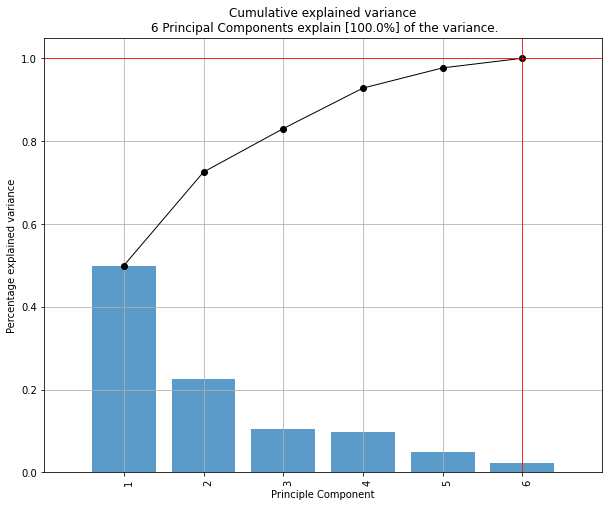

<Figure size 432x288 with 0 Axes>

In [ ]:
from pca import pca
model = pca(n_components=6)
results = model.fit_transform(final_df)
fig, ax = model.plot()

# clustering

## Gaussian Mixture Model

In [ ]:
for i in range(2,8):
    gm=GaussianMixture(n_components=i).fit(reduced_df)
    gm_score=silhouette_score(reduced_df,gm.predict(reduced_df))
    print(f'silhouette score for {i} clusters is = {gm_score}')

silhouette score for 2 clusters is = 0.4474119955709115
silhouette score for 3 clusters is = 0.358930119216526
silhouette score for 4 clusters is = 0.3070283472612148
silhouette score for 5 clusters is = 0.30987707580153345
silhouette score for 6 clusters is = 0.3313323124377572
silhouette score for 7 clusters is = 0.3079681055553412


## Kmeans

In [ ]:
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,max_iter=50).fit(reduced_df)
    kmeans_score=silhouette_score(reduced_df,kmeans.labels_)
    print(f'silhouette score for {i} clusters = {kmeans_score}')

silhouette score for 2 clusters = 0.447157742293467
silhouette score for 3 clusters = 0.3648740356118049
silhouette score for 4 clusters = 0.3311509542845657
silhouette score for 5 clusters = 0.35326978039399776
silhouette score for 6 clusters = 0.36260214125679585
silhouette score for 7 clusters = 0.35604964669460615


both GMM and Kmeans are producing same results for 2 clusters

## cluster visulisation

In [ ]:
def cluster_visualisation(n):
    gm=GaussianMixture(n_components=n,random_state=42).fit(reduced_df)
    labels=gm.predict(reduced_df)
    centers=gm.means_
    reduced_df['labels']=labels
    sns.scatterplot(x=reduced_df['dimension_1'],y=reduced_df['dimension_2'],hue=reduced_df['labels'],palette='colorblind')
    plt.scatter(centers[:,0],centers[:,1],color='black',s=200,alpha=0.5)
    reduced_df.drop('labels',axis=1,inplace=True)
    plt.plot()

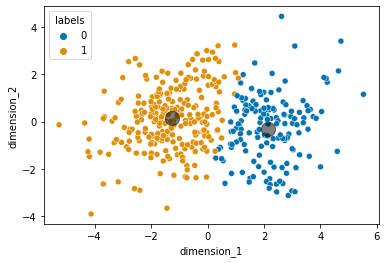

In [ ]:
cluster_visualisation(2)

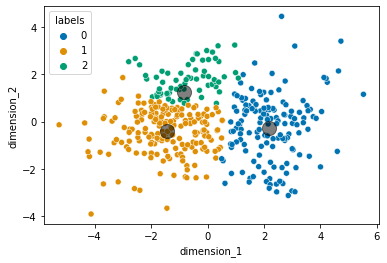

In [ ]:
cluster_visualisation(3)

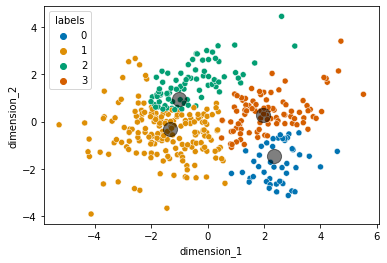

In [ ]:
cluster_visualisation(4)

# Data Recovery

* Each cluster present in the visualization above has a central point.
* These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. 
* For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. 
- Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [ ]:
#Consider the number clusters as 2
gm=GaussianMixture(n_components=2,random_state=42).fit(reduced_df)
labels=gm.predict(reduced_df)
centers=gm.means_

In [ ]:
centers

array([[ 2.1349413 , -0.28909267],
       [-1.2422204 ,  0.16820922]])

## Inverse transform of centers

In [ ]:
log_centers = pca.inverse_transform(centers)

In [ ]:
log_centers

array([[8.551415  , 8.95878876, 9.35712669, 6.97373422, 8.41989885,
        7.0042194 ],
       [9.15571874, 7.63392712, 7.87257393, 7.69423731, 5.83770246,
        6.68305733]])

# Exponentiate the centers

In [ ]:
true_centers = np.exp(log_centers)

# Display the true centers

In [ ]:
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = final_df.columns)
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0
Segment 1,9468.0,2067.0,2624.0,2196.0,343.0,799.0


$\textit {Segment 0}$ :The first segment might represent retail stores
<br>
$\textit {Segment 1}$ :The second segment might be from Cafe's and restaurants, which require more amount of Milk and Fresh Foods.

The analysis for each cluster is as follows:

$\textit {Segment 0}$: Below can be depicted if the center of this cluster's total purchase costs are below or above each respective <br> categories' mean: <br>
Below the mean: Fresh, Frozen, Delicatessen <br>
Above the mean: Milk, Grocery, Detergents_Paper <br>
The customers that belong to this cluster are most likely Big Markets and Retail stores, because of the above average spending in Milk, Grocery and Detergents_Paper, which indicates high volume of these type of products are transactioned.

$\textit {Segment 1}$: Below can be depicted if the center of this cluster's total purchase costs are below or above each respective <br> categories' mean:<br>
Below the mean: Fresh, Milk, Grocey, Frozen, Detergents_Paper,  Delicatessen <br>
Above the mean: none <br>
I think this cluster can represent Restaurants and Cafes, and maybe, some local Markets with a focus on fresh food, because all the values are below the average of each category, which is indicative of low volume, but, the highest expenditure is on Fresh products.

Assuming the findings above are close to the reality, we can say that not all customers will be equally affected. For example, for Big Retails, that have a high daily volume of sales, 3 days a week might not be sufficient for their needs. On the other hand, some local market or restaurant with some storage capability, can receive only for 3 days a week.

So an analysis on the needs of each Cluster's mean customer would be the proper way to decide how to run A/B tests on these customers. For example, it can be concluded that for Segment 0, 3 times a week on average is best, and for Segment 1, 5 days a week is better.

The A/B tests could run as follows:

For each Cluster, it would be sampled 20 clients. Then, for these 20 clients, we would change the delivery system to '3 day a week'. For Segment 0, which we think are Retailers, we would test the hypothesis '3 days a week' would result in a negative answer. Meaning, we believe for Cluster 0, they prefer 5 days a week. In the cases the response is positive, we could further learn why these customer prefer 5 days a week. This could be done by using the A/B test results to feed a supervised learner (as the target variable), where the customer segment would also be a feature.

The same would be done for Segment 1, but for these, we believe 3 days a week would generate positive feedback. If negative feedback happened, we could apply the same procedures to feed a supervised learner to the learn more about these customers.

Afterwards, we could use the supervised learner, to predict more sampled customers, for example, another 20 customers, and retest the delivery system, to verify the hypothesis of the supervised learner hold true. It can be considered like a second pass or run of the A/B test.

# Visualizing Underlying Distributions

In [79]:
channel = pd.DataFrame(df1['Channel'], columns = ['Channel'])
channel = channel.drop(channel.index[outliers_index]).reset_index(drop = True)

In [81]:
reduced_df['labels']=channel

In [82]:
reduced_df.head()

,dimension_1,dimension_2,labels
0,1.779322,-0.660449,2
1,1.882034,0.461741,2
2,1.993507,1.247080,2
3,-0.998581,1.369364,1
4,0.993847,2.078314,2


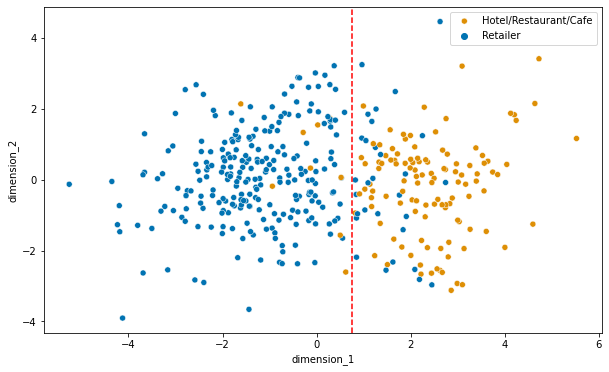

In [100]:
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=reduced_df['dimension_1'],y=reduced_df['dimension_2'],hue=reduced_df['labels'],palette='colorblind',ax = ax)
plt.legend(['Hotel/Restaurant/Cafe', 'Retailer'])
plt.axvline(0.75,color='r',ls='--')

The clustering algorithm seems to behave rather well. The clusters seem a good fit of the Channel feature. The separation of the categories happens around the same value, an imaginary vertical line with a constant value for Dimension 1 of around 0.75 or so. The diferences is that Segment 0 had more data points at the left side of this imaginary line, and what happens here is the opposite, there are more points of Restaurants (Cluster 1), to the right of the line.

These classifications seem rather coherent with my prediction, which was for Segment 0, Big Markets and Retail stores, and for segment 1, Restaurants and Cafes, and maybe, some local Markets. So, in fact, these points I mention above (which are left or right of this vertical line), might be these corner cases, where there are Restaurants with big spending, similar to Retailers, and small Retailers with smaller spending, similar to Restaurants.